In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip /content/archive.zip

In [ ]:
x_train = pd.read_csv("/content/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("/content/csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv("/content/csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv("/content/csvTestLabel 3360x1.csv",header=None)

In [ ]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test.head()

,0
0,1
1,1
2,2
3,2
4,3


In [ ]:
# Converting dataframe to list format
x_train = x_train.iloc[:,:].values
x_test = x_test.iloc[:,:].values
y_train = y_train.iloc[:,:].values
y_test = y_test.iloc[:,:].values

In [ ]:
x_test.shape

(3360, 1024)

In [ ]:
y_test.shape

(3360, 1)

In [ ]:
print("Distinct Labels: ", np.unique(y_train))

Distinct Labels:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


In [ ]:
# Reshape the image shape into 32 x 32
x_train = x_train.reshape(x_train.shape[0],32,32)
x_test = x_test.reshape(x_test.shape[0],32,32)

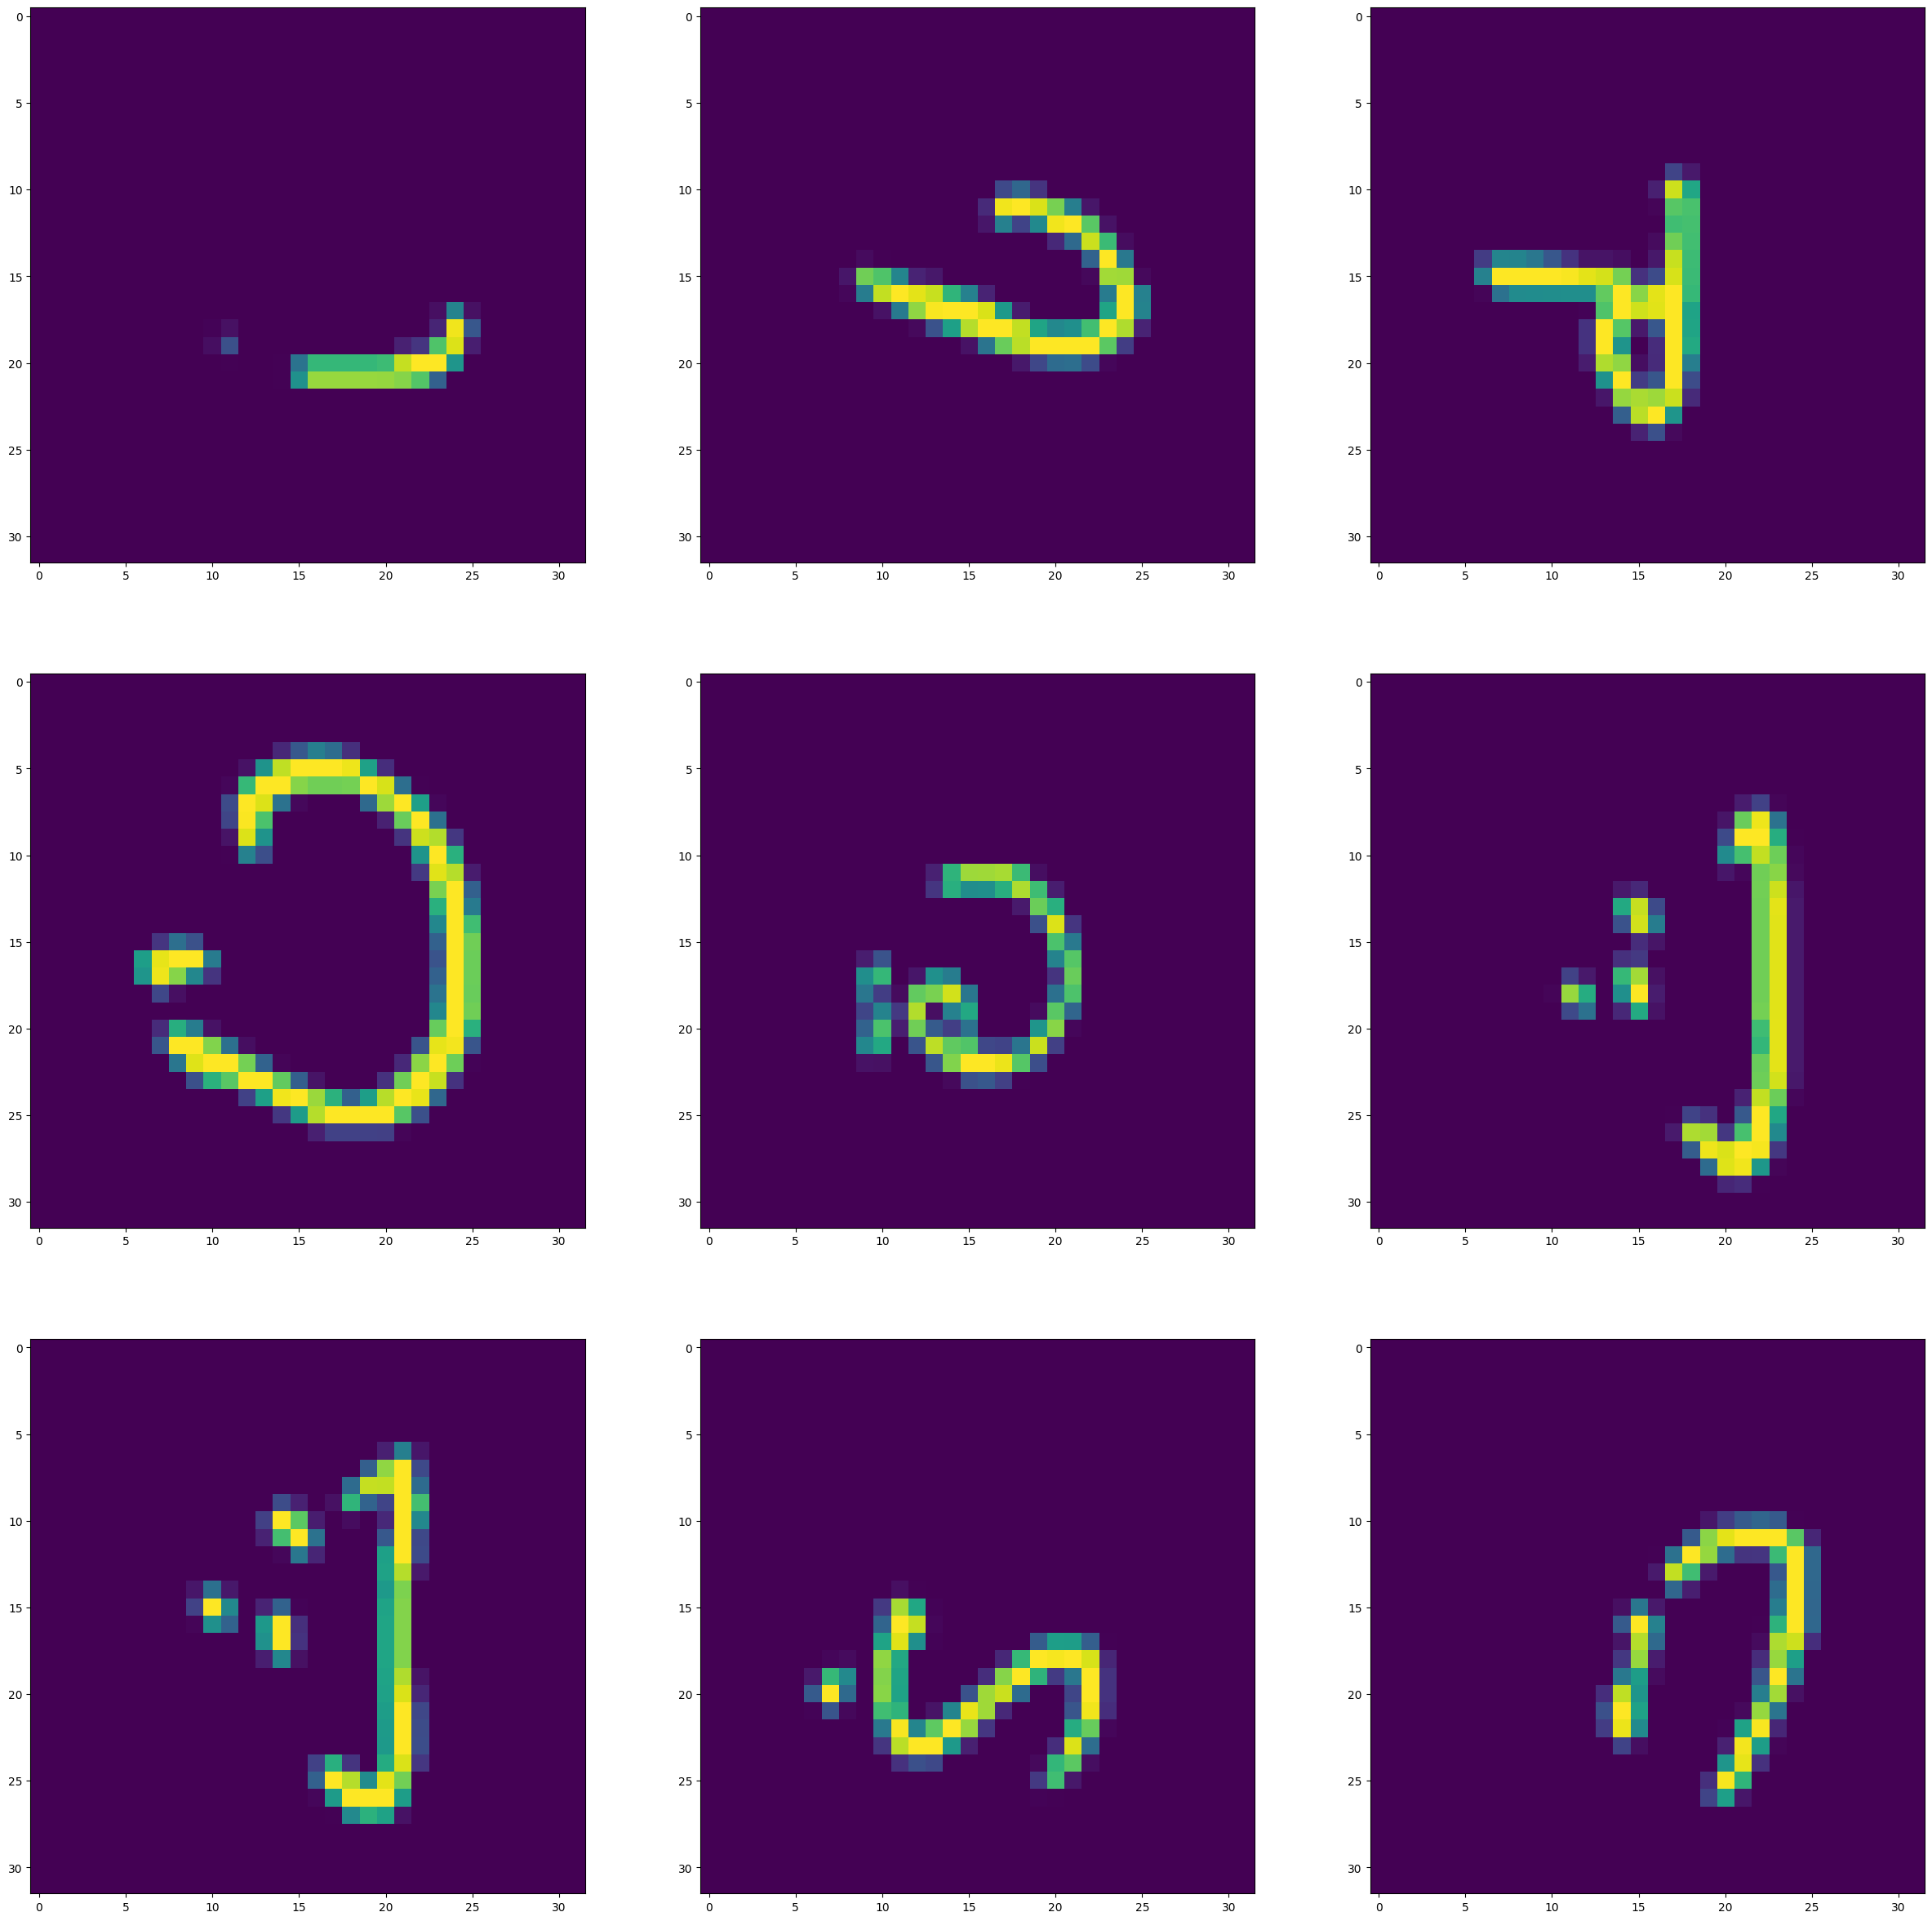

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (30,30))

for i in range(3):
    for j in range(3):
        ax[i,j].imshow(x_train[np.random.randint(0,x_train.shape[0])])

In [ ]:
# Normalizing the data
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# One hot encoding of labels
total_classes = len(np.unique(y_train))+1
print(total_classes)

29


In [ ]:
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test, total_classes)

In [ ]:
y_train.shape

(13440, 29)

In [ ]:
y_train[:2]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
# Expanding the dimensions
x_train = x_train.reshape([-1, 32, 32, 1])
x_test = x_test.reshape([-1, 32, 32, 1])

In [ ]:
print("Training size:",x_train.shape)
print("Testing size:",x_test.shape)

Training size: (13440, 32, 32, 1)
Testing size: (3360, 32, 32, 1)


In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(total_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [ ]:
# Image augmentation
image_generator = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
image_generator.fit(x_train)

In [ ]:
x_test.shape[0]

3360

In [ ]:
y_test.shape

(3360, 29)

In [ ]:
batch_size = 128

history = model.fit_generator(image_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=100, verbose=2,
                    validation_data=(x_test, y_test),
                    validation_steps=x_test.shape[0] // batch_size)

Epoch 1/100


<ipython-input-24-67f2b337446e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(image_generator.flow(x_train, y_train, batch_size=batch_size),


105/105 - 16s - loss: 2.6405 - accuracy: 0.1868 - val_loss: 1.7925 - val_accuracy: 0.3604 - 16s/epoch - 155ms/step
Epoch 2/100
105/105 - 4s - loss: 1.5682 - accuracy: 0.4382 - val_loss: 1.1663 - val_accuracy: 0.5643 - 4s/epoch - 39ms/step
Epoch 3/100
105/105 - 4s - loss: 1.1239 - accuracy: 0.5894 - val_loss: 0.8422 - val_accuracy: 0.7003 - 4s/epoch - 38ms/step
Epoch 4/100
105/105 - 5s - loss: 0.8781 - accuracy: 0.6805 - val_loss: 0.6520 - val_accuracy: 0.7646 - 5s/epoch - 47ms/step
Epoch 5/100
105/105 - 4s - loss: 0.7557 - accuracy: 0.7318 - val_loss: 0.6519 - val_accuracy: 0.7530 - 4s/epoch - 38ms/step
Epoch 6/100
105/105 - 4s - loss: 0.6446 - accuracy: 0.7746 - val_loss: 0.5453 - val_accuracy: 0.8083 - 4s/epoch - 38ms/step
Epoch 7/100
105/105 - 5s - loss: 0.5919 - accuracy: 0.7903 - val_loss: 0.4502 - val_accuracy: 0.8488 - 5s/epoch - 47ms/step
Epoch 8/100
105/105 - 4s - loss: 0.5376 - accuracy: 0.8141 - val_loss: 0.5037 - val_accuracy: 0.8304 - 4s/epoch - 37ms/step
Epoch 9/100
105/1

In [ ]:
model.evaluate(x_test, y_test)

105/105 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9726


[0.1477869600057602, 0.9726190567016602]

<ipython-input-26-805c3ffbcb0b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


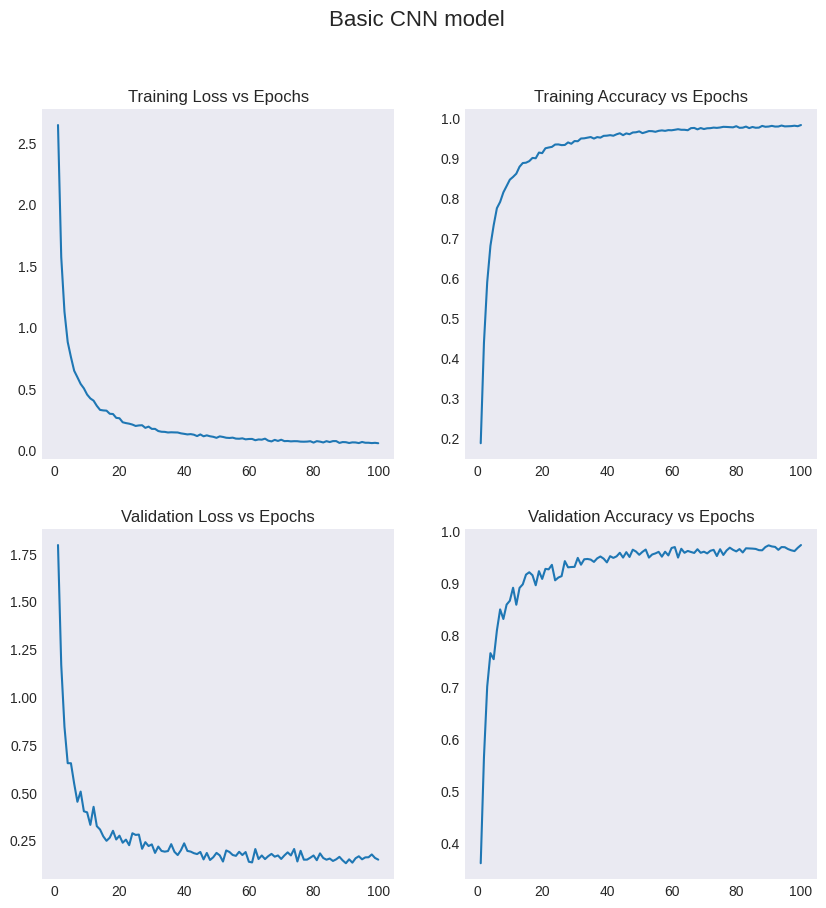

In [ ]:
import seaborn as sns
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 101), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Basic CNN model', size=16)
plt.show()